In [1]:
import numpy as np

file_path = 'digit_123.mat'
# 创建一个字典，用来存储我们从文件中解析出来的所有变量
parsed_data = {}

# 'with open' 会帮我们安全地打开和关闭文件
with open(file_path, 'r') as f:
    current_var_name = None
    current_var_data = []
    
    # 逐行读取文件
    for line in f:
        # 去掉行首行尾的空白字符
        line = line.strip()
        
        # 如果是注释行
        if line.startswith('#'):
            # 如果这行是变量名定义，说明一个新数据块开始了
            if line.startswith('# name:'):
                # 在开始新数据块之前，先把上一个数据块保存起来
                if current_var_name and current_var_data:
                    # 将收集到的字符串数据转换成numpy数组
                    array = np.array(current_var_data, dtype=float)
                    parsed_data[current_var_name] = array
                
                # 获取新的变量名，并清空数据列表，准备接收新数据
                current_var_name = line.split(':')[-1].strip()
                current_var_data = []
            # 其他注释行直接跳过
            continue
        
        # 如果是数据行，就把它按空格分割，然后加到当前变量的数据列表中
        if line: # 确保不是空行
            current_var_data.extend(line.split())

# 循环结束后，不要忘记保存最后一个读取的数据块
if current_var_name and current_var_data:
    array = np.array(current_var_data, dtype=float)
    parsed_data[current_var_name] = array

# --- 解析完成，我们来查看一下结果 ---
print("✅ 文件解析成功！")
print("在文件中找到了以下变量：", list(parsed_data.keys()))
print("-" * 20)

# 打印出每个变量的形状 (shape)
for name, data in parsed_data.items():
    print(f"变量 '{name}' 的形状: {data.shape}")

# 现在，你可以像使用字典一样，通过变量名来访问数据了
# 例如，获取 'testx' 的数据
testx_data = parsed_data.get('testx')
if testx_data is not None:
    print("\n成功获取 'testx' 数据，它的前5个值是:")
    print(testx_data[:5])

✅ 文件解析成功！
在文件中找到了以下变量： ['ans', 'testx', 'testy', 'trainx', 'trainy']
--------------------
变量 'ans' 的形状: (2,)
变量 'testx' 的形状: (7680,)
变量 'testy' 的形状: (30,)
变量 'trainx' 的形状: (7680,)
变量 'trainy' 的形状: (30,)

成功获取 'testx' 数据，它的前5个值是:
[-0.99999988 -0.99999988 -0.99999988 -0.99998307 -0.99836063]


In [2]:
# --- 步骤 2: 将一维数据重塑为二维矩阵 ---

# 从我们解析好的字典里，先把所有数据拿出来
ans_data = parsed_data['ans']
test_x_1d = parsed_data['testx']
test_y_1d = parsed_data['testy']
train_x_1d = parsed_data['trainx']
train_y_1d = parsed_data['trainy']

# 根据样本数和特征数，定义矩阵的形状
num_test_samples = 30
num_train_samples = 30 
num_features = 256

# 使用 .reshape() 函数进行重塑
test_x = test_x_1d.reshape(num_test_samples, num_features)
train_x = train_x_1d.reshape(num_train_samples, num_features)

print("✅ 数据重塑成功!")
print(f"重塑后 'test_x' 的形状: {test_x.shape}")
print(f"重塑后 'train_x' 的形状: {train_x.shape}")
print(f"测试集标签 'test_y_1d' 的形状: {test_y_1d.shape}")
print(f"训练集标签 'train_y_1d' 的形状: {train_y_1d.shape}")

# 现在，train_x 和 test_x 就是标准的机器学习输入格式了

✅ 数据重塑成功!
重塑后 'test_x' 的形状: (30, 256)
重塑后 'train_x' 的形状: (30, 256)
测试集标签 'test_y_1d' 的形状: (30,)
训练集标签 'train_y_1d' 的形状: (30,)


/Users/yuema/Documents/stu_proj/digi_rec_proj/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 36825 (\N{CJK UNIFIED IDEOGRAPH-8FD9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yuema/Documents/stu_proj/digi_rec_proj/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yuema/Documents/stu_proj/digi_rec_proj/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yuema/Documents/stu_proj/digi_rec_proj/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20010 (\N{CJK UNIFIED IDEOGRAPH-4E2A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yuema/Doc

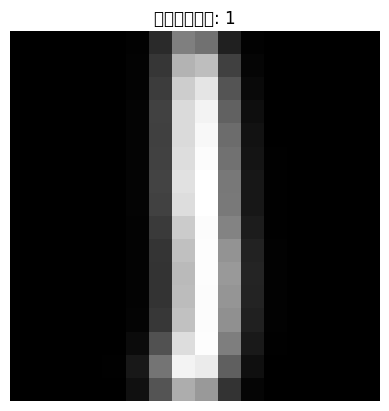

In [3]:
import matplotlib.pyplot as plt

# 让我们来查看训练集中的第一个样本
# train_x 的第一行就是第一个样本的数据
first_image_vector = train_x[0] 
# train_y_1d 的第一个元素就是它的标签
first_image_label = train_y_1d[0]

# 将 256 个元素的一维向量重塑为 16x16 的二维矩阵
image_matrix = first_image_vector.reshape(16, 16)

# 使用 matplotlib 的 imshow 函数来显示图像
# cmap='gray' 表示使用灰度色谱，数字大=白色，数字小=黑色
plt.imshow(image_matrix, cmap='gray')
plt.title(f"这是一个数字: {int(first_image_label)}") # 将标签显示在标题中
plt.axis('off') # 不显示坐标轴
plt.show()

/var/folders/xh/w8n362517zndsxkj07llvjt80000gn/T/ipykernel_61329/1293454960.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_y_1d.astype(int), palette="viridis")
/Users/yuema/Documents/stu_proj/digi_rec_proj/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yuema/Documents/stu_proj/digi_rec_proj/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23383 (\N{CJK UNIFIED IDEOGRAPH-5B57}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yuema/Documents/stu_proj/digi_rec_proj/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from font(s) Ari

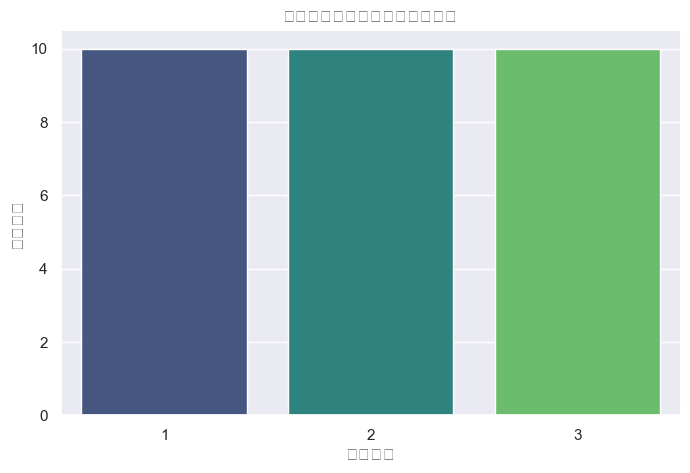

各数字的样本数:
{np.float64(1.0): np.int64(10), np.float64(2.0): np.int64(10), np.float64(3.0): np.int64(10)}


In [4]:
import seaborn as sns
import numpy as np

# 设置绘图风格
sns.set(style="darkgrid")

# 绘制条形图来显示每个标签的数量
plt.figure(figsize=(8, 5)) # 设置画布大小
sns.countplot(x=train_y_1d.astype(int), palette="viridis")

plt.title("训练集中各数字的样本数量分布")
plt.xlabel("数字标签")
plt.ylabel("样本数量")
plt.show()

# 也可以用 numpy 直接打印出具体的数字
unique, counts = np.unique(train_y_1d, return_counts=True)
print("各数字的样本数:")
print(dict(zip(unique, counts)))

/Users/yuema/Documents/stu_proj/digi_rec_proj/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yuema/Documents/stu_proj/digi_rec_proj/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yuema/Documents/stu_proj/digi_rec_proj/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yuema/Documents/stu_proj/digi_rec_proj/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20687 (\N{CJK UNIFIED IDEOGRAPH-50CF}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yuema/Documents/stu_proj/digi_rec

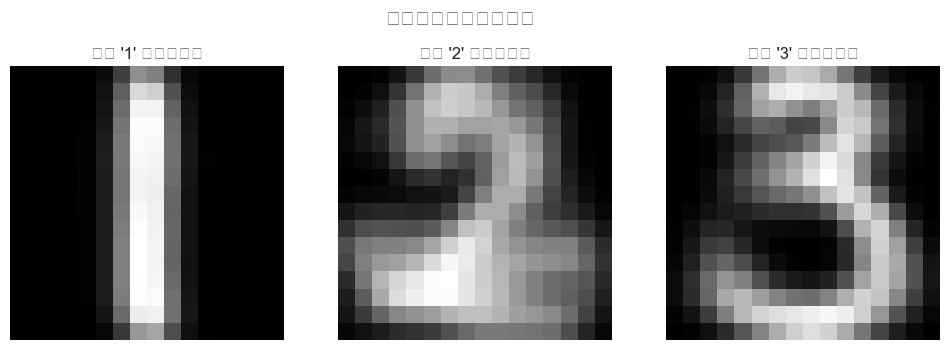

In [5]:
# 创建一个 1x3 的子图网格，用来并排显示3个数字的平均图像
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# 我们要看的数字是 1, 2, 3
labels_to_show = [1, 2, 3]

for i, label in enumerate(labels_to_show):
    # 1. 找到所有标签为当前数字的图像
    #    train_y_1d == label 会返回一个布尔数组 [True, False, True, ...]
    #    train_x[...] 会根据这个布尔数组筛选出对应的行
    images_of_a_digit = train_x[train_y_1d == label]
    
    # 2. 计算这些图像的平均值
    #    axis=0 表示沿着行的方向（样本方向）进行平均
    mean_image = images_of_a_digit.mean(axis=0)
    
    # 3. 将平均后的一维向量重塑为 16x16 图像
    mean_image_matrix = mean_image.reshape(16, 16)
    
    # 4. 在对应的子图上显示图像
    ax = axes[i]
    ax.imshow(mean_image_matrix, cmap='gray')
    ax.set_title(f"数字 '{label}' 的平均图像")
    ax.axis('off')

plt.suptitle("各数字的平均图像对比")
plt.show()

✅ Model training complete!
✅ Prediction complete!

First 10 predictions by the model: [1 1 1 1 1 1 1 1 1 1]
First 10 true labels:            [1 1 1 1 1 1 1 1 1 1]
Accuracy: 1.0000
              precision    recall  f1-score   support

     Digit 1       1.00      1.00      1.00        10
     Digit 2       1.00      1.00      1.00        10
     Digit 3       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:


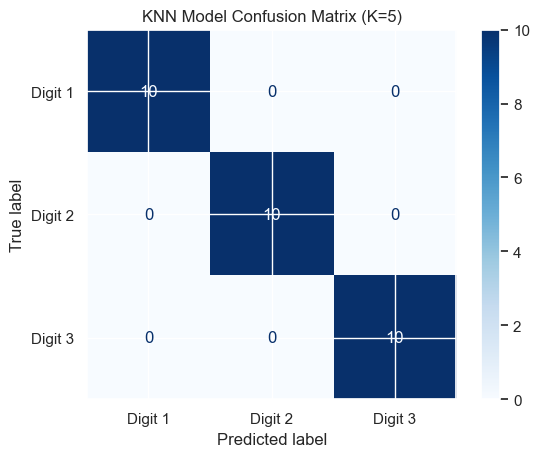

In [6]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize a KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
# Train the model
knn_model.fit(train_x, train_y_1d)
print("✅ Model training complete!")
# Predict
y_pred = knn_model.predict(test_x)
print("✅ Prediction complete!")
print("\nFirst 10 predictions by the model:", y_pred[:10].astype(int))
print("First 10 true labels:           ", test_y_1d[:10].astype(int))

# Evaluate
accuracy = accuracy_score(test_y_1d, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print(classification_report(test_y_1d, y_pred.astype(int), target_names=['Digit 1', 'Digit 2', 'Digit 3']))

# Confusion Matrix
print("\nConfusion Matrix:")
ConfusionMatrixDisplay.from_estimator(
    estimator=knn_model,
    X=test_x,
    y=test_y_1d,
    display_labels=['Digit 1', 'Digit 2', 'Digit 3'],
    cmap=plt.cm.Blues 
)
plt.title("KNN Model Confusion Matrix (K=5)")
plt.show()

✅ Model training complete!
Making predictions on the test data...
✅ Predictions complete!
Accuracy: 0.6333
              precision    recall  f1-score   support

         1.0       1.00      0.70      0.82        10
         2.0       0.48      1.00      0.65        10
         3.0       1.00      0.20      0.33        10

    accuracy                           0.63        30
   macro avg       0.83      0.63      0.60        30
weighted avg       0.83      0.63      0.60        30


Confusion Matrix:


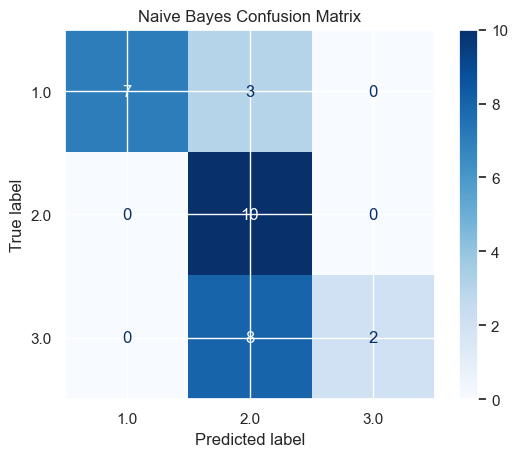

In [7]:
# Naive Bayes Model

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Initialize the model
nb_model = GaussianNB()
# Train the model
nb_model.fit(train_x, train_y_1d)
print("✅ Model training complete!")
# Predict
print("Making predictions on the test data...")
y_pred_nb = nb_model.predict(test_x)
print("✅ Predictions complete!")

# Evaluate
accuracy_nb = accuracy_score(test_y_1d, y_pred_nb)
print(f"Accuracy: {accuracy_nb:.4f}")

print(classification_report(test_y_1d, y_pred_nb))

# Confusion Matrix
print("\nConfusion Matrix:")
ConfusionMatrixDisplay.from_estimator(
    nb_model,
    test_x,
    test_y_1d,
    cmap=plt.cm.Blues
)
plt.title("Naive Bayes Confusion Matrix")
plt.show()

Training the Logistic Regression model...
✅ Model training complete!
Making predictions on the test data...
✅ Predictions complete!
Accuracy: 1.0000
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        10
         2.0       1.00      1.00      1.00        10
         3.0       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:


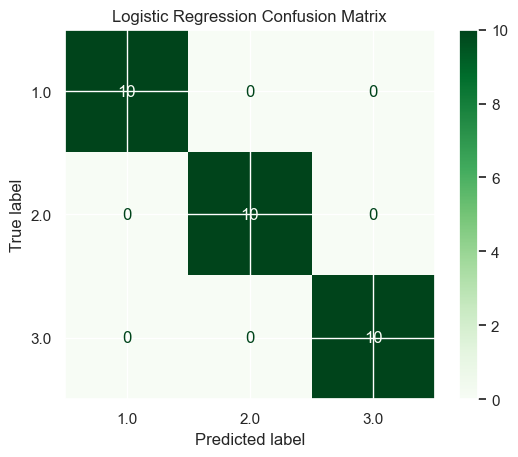

In [ ]:
# Logistic Regression ModelS

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

lr_model = LogisticRegression(solver='saga', max_iter=1000, random_state=42)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(train_x)
test_x_scaled = scaler.transform(test_x)

# Train the Model
print("Training the Logistic Regression model...")
lr_model.fit(train_x, train_y_1d)
print("✅ Model training complete!")


# Make Predictions
print("Making predictions on the test data...")
y_pred_lr = lr_model.predict(test_x)
print("✅ Predictions complete!")

# Evaluate
accuracy_lr = accuracy_score(test_y_1d, y_pred_lr)
print(f"Accuracy: {accuracy_lr:.4f}")
print(classification_report(test_y_1d, y_pred_lr))

# Confusion Matrix
print("\nConfusion Matrix:")
ConfusionMatrixDisplay.from_estimator(
    lr_model,
    test_x,
    test_y_1d,
    cmap=plt.cm.Greens # Let's use a different color map this time
)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

✅ Model training complete!
✅ Predictions complete!
Accuracy: 0.8667
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        10
         2.0       0.71      1.00      0.83        10
         3.0       1.00      0.60      0.75        10

    accuracy                           0.87        30
   macro avg       0.90      0.87      0.86        30
weighted avg       0.90      0.87      0.86        30


Confusion Matrix:


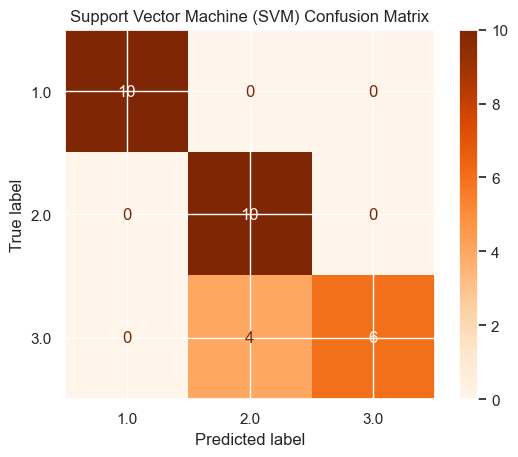

In [14]:
# SVM Model
from sklearn.svm import SVC # Import the Support Vector Classifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

svm_model = SVC(kernel='linear', random_state=42)

# Train the Model
svm_model.fit(train_x_scaled, train_y_1d)
print("✅ Model training complete!")

# Make Predictions
y_pred_svm = svm_model.predict(test_x_scaled)
print("✅ Predictions complete!")

# Evaluate
accuracy_svm = accuracy_score(test_y_1d, y_pred_svm)
print(f"Accuracy: {accuracy_svm:.4f}")
print(classification_report(test_y_1d, y_pred_svm))

# Confusion Matrix
print("\nConfusion Matrix:")
ConfusionMatrixDisplay.from_estimator(
    svm_model,
    test_x_scaled, # Use scaled data for visualization as well
    test_y_1d,
    cmap=plt.cm.Oranges # Let's use another color map
)
plt.title("Support Vector Machine (SVM) Confusion Matrix")
plt.show()